# OSEMN

According to a popular model, the elements of data science are:

* Obtaining data
* Scrubbing data
* Exploring data
* Modeling data
* iNterpreting data

and hence the acronym OSEMN, pronounced as “Awesome”.

We will start with the **O**, and let's have a quick look at what it all boils down to:

In [1]:
# O: obtaining data
#!wget https://www.dropbox.com/s/ebe1cnyd2gm836a/populations.txt -P data/

In [5]:
# S: scrubbing data
import numpy as np
data = np.loadtxt('data/populations.txt')
year, hares, lynxes, carrots = data.T # trick: columns to variables
# this is not real scrubbing, rather a simple operation to better handle the data


array([1900., 1901., 1902., 1903., 1904., 1905., 1906., 1907., 1908.,
       1909., 1910., 1911., 1912., 1913., 1914., 1915., 1916., 1917.,
       1918., 1919., 1920.])

'cat' is not recognized as an internal or external command,
operable program or batch file.


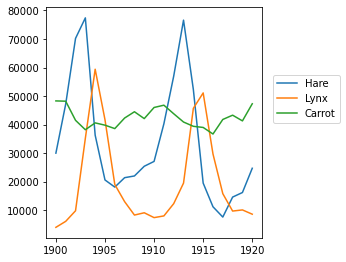

In [6]:
# E: exploring data
!cat data/populations.txt

from matplotlib import pyplot as plt
%matplotlib inline

plt.axes([0.2, 0.1, 0.5, 0.8]) 
plt.plot(year, hares, year, lynxes, year, carrots) 
plt.legend(('Hare', 'Lynx', 'Carrot'), loc=(1.05, 0.5))

In [ ]:
# M: modeling

By plotting the data a clear (and reasonable) correlations between pray and predator becomes evident.

 - How can it be quantified?
 - Is that statistical significant?
 - What about the correlation between carrots and hares?
 
 We will deal with data modeling in few weeks, when we will learn to fit the data.

In [ ]:
# N: interpreting

Finding correlations in data is one of the main goals of data science, though that is not the end of the story: as this interesting [site](http://tylervigen.com/spurious-correlations) demonstrates, **correlations does not imply causation**.

**Optional exercise**: write an algorithm that determines and quantifies a correlation between two time series. Use as an example the hare-lynx-carrot dataset.

## Obtaining and processing data

Accessing data may not be as easy as it seems. The previous example, where the data is stored on your own machine, represents the simplest (but alas, less common) case. Data is usually stored on remote machines, which can be either *publicly accessible* (everyone can access the data, even without credentials) rather than *private*. In the case of the former, things may be straightforward, whereas in the latter case you need to worry about a few things.

In both cases, depending on the size of the dataset, the managment of the dataset can become extremely complicated. We won't deal here with large datasets (which require a whole course *per se*), but still we should pay attention to few basic things: for instance, *it is not wise to keep (and even worse commit) data into a git repository*!

The suggestion is then to create a directory somewhere and copy the example datasets there. From a terminal:

```bash

# create a data directory in your home directory
mkdir data/

# check the content (it's empty now of course)
ls -ltr data/

# in the case you need to move there:
cd data/

# if you need to copy a file
cp data/data_original.txt data/data_copy.txt
```

### Public data

An increasingly number of institutions, reaserch centers, experiments, ... are making their data public.

A nice set of interesting datasets can be found on this [server](https://archive.ics.uci.edu/ml/datasets.php) that collects training/test data for machine learning developments. Several of those belong to physical sciences, and may be worth a look. Since they are public, you can freely download any of those. However, they usually come with a license (e.g. you won't be allowed to make profit from them), and deserve a reference in your paper, if you publish some result.

Sometimes, they are used as the input to machine learning challenges, where different groups compete to achieve the best result.

In the following, we consider a dataset from the MAGIC experiment. We will get it with the `wget` command:

In [ ]:
# download the dataset and its description to the data/ directory
#!wget https://archive.ics.uci.edu/ml/machine-learning-databases/magic/magic04.data -P data/
#!wget https://archive.ics.uci.edu/ml/machine-learning-databases/magic/magic04.names -P data/    

In [ ]:
# read the description file. This can (and should) be done from a terminal
!cat data/magic04.names

### Accessing the data without downloading the file(s)

It is possible to download and load remote files via their url from within python (and thus on a jupyter session). This is a rather powerful tool as it allows http communications, I/O streaming and so on.

Care should be put as the dataset is stored in memory.

In [7]:
import urllib.request
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/magic/magic04.names'
with urllib.request.urlopen(url) as data_file:
    #print(data_file.read(300))
    for line in data_file:
        print(line)

b'1. Title of Database: MAGIC gamma telescope data 2004\n'
b'\n'
b'2. Sources:\n'
b'\n'
b'   (a) Original owner of the database:\n'
b'\n'
b'       R. K. Bock\n'
b'       Major Atmospheric Gamma Imaging Cherenkov Telescope project (MAGIC)\n'
b'       http://wwwmagic.mppmu.mpg.de\n'
b'       rkb@mail.cern.ch\n'
b'\n'
b'   (b) Donor:\n'
b'\n'
b'       P. Savicky\n'
b'       Institute of Computer Science, AS of CR\n'
b'       Czech Republic\n'
b'       savicky@cs.cas.cz\n'
b'\n'
b'   (c) Date received: May 2007\n'
b'\n'
b'3. Past Usage:\n'
b'\n'
b'   (a) Bock, R.K., Chilingarian, A., Gaug, M., Hakl, F., Hengstebeck, T.,\n'
b'       Jirina, M., Klaschka, J., Kotrc, E., Savicky, P., Towers, S.,\n'
b'       Vaicilius, A., Wittek W. (2004).\n'
b'       Methods for multidimensional event classification: a case study\n'
b'       using images from a Cherenkov gamma-ray telescope.\n'
b'       Nucl.Instr.Meth. A, 516, pp. 511-528.\n'
b'\n'
b'   (b) P. Savicky, E. Kotrc.\n'
b'       Experimental Stu

###  Copy data from a remote machine

Often datasets are not available on websites, but rather they are stored on some remote machine. Several tools have been developed allow you to get remote data, even from within python (e.g. [paramiko](https://www.paramiko.org/)), but it's often enough to get a local copy.

The unix `scp` command is of great help in this case. Its syntax resembles the one of the `cp` command, e.g. from a terminal:

```bash
scp username@machinename.unipd.it:/path/to/the/file/filename.* path/to/the/target/
```

The `scp` works provided that you have the necessary permissions and authorization to log in to the remote machine, and you know the location of the files within that machine. This seems trivial, but it's one of the most difficult aspects you will have to deal when trying to obtain the data.

However, it could be worse. Especially in large reaserch centers or companies, the remote machine `R` is often not accessible from "outside", meaning that it is hidden behind a firewall. In that case you may need to use to access to a *gate* machine `G` first (with very limited disk space and functionality), and only then you can connect to the machine. This also means that you cannot run the `scp` command twice to get the data.

The simplest solution is to create an `ssh` tunnel:

``` bash
ssh -L port:<address of R known to G>:22 <user at G>@<address of G> 

scp -P port <user at R>@localhost:/path/to/the/file file-name-to-be-copied
```

where `port` is the port number which is a number between 1025 and 65535, `R` is the machine where the files are located, `G` is the gate, and `user` is the username.

The first command redirects your local port `port` to port 22 of `R`. It could happen that the chosen port number is already in use, in that case just pick another unused port.

In summary, just getting the data could be complicated.

## Data Formats

Datasets can be stored in several different ways. Sometimes, they have formats which are application-dependent, even though more and more standards are being established.

#### Proprietary formats

In some of those cases, the format of the data is proprietary, meaning that the software house does not provide the documentation needed to read and write the data in that format. We won't cover those cases in this course, and there are a number of reasons to avoid them.

#### Open formats

In case an open, widely-accepted data formats, Python has "readers" for most of these, another reason for being the optimal programming language for data analysis. In the follwing, we will explore the most common ones.

### Text files 

Plain text files are very common, and are used for "readibility", at the price of a poor storing efficiency. [UTF-8](https://en.wikipedia.org/wiki/UTF-8) is the most common encoding.

Reading (and writing) text files in Python is straightforward:

In [9]:
file_name = "data/magic04.data"
n = 0

# mode can be specified for writing, reading or both
with open(file_name, mode = 'r') as f:
    # print-out the whole file
    # print(f.read()) 
    for line in f:
        print(n, ":")
        # print line by line
        print(line)
        # each line is a string, you need to split it yourself
        #for c in line.split(','): print("  ", c) # check the functionalities of the split() method
        n += 1
        if n > 10: break

FileNotFoundError: [Errno 2] No such file or directory: 'data/magic04.data'

Similarly, it's possible to write files to a txt file:

In [16]:
out_file_name = "data/magic04.out"

with open(out_file_name, 'a') as outfile:
    outfile.write(line + '\n') # write last line to a file

!cat data/magic04.out

TypeError: can't concat str to bytes

### CSV files

Text files are already framed into a defined structured, in a "table-like" manner. If the values/features/attributes are separated with a comma, these files are colled "comma separated values" (CSV), even though the separator may well not be the "," symbol. It could also happen that the separator is a whitespace, or a tab character.

Python has a package to deal with those, named `csv`:

In [15]:
import csv

n = 0

with open('data/magic04.data') as data_file:
    for line in csv.reader(data_file, delimiter=','): # the delimiter is often guessed by the reader
        # again note that elements of each line are treated as strings
        # if you need to convert them into numbers, you need to to that yourself
        fLength, fWidth, fSize, fConc, fConc1, fAsym, fM3Long, fM3Trans, fAlpha, fDist = map(float, line[:-1])
        category = line[-1]
        print(fLength, fWidth, fSize, fConc, fConc1, fAsym, fM3Long, fM3Trans, fAlpha, fDist, category)
        n += 1
        if n > 10: break

FileNotFoundError: [Errno 2] No such file or directory: 'data/magic04.data'

Sometimes, csv files have comments (e.g. starting with '#'), which cannot be interpreted by the reader. Tricks like:

```python
csv.reader(row for row in f if not row.startswith('#'))
```

may be useful to skip those lines.

### JSON files

JSON stands for JavaScript Object Notation, and is a format widely used for web-based resource sharing. It is very similar in structure to a Python nested dictionary. It is humand readable (then human-editable), even if readability may be difficult for complex data structures. Its use is convenient in Python, as its items can be accessed by key. Here is an example http://json.org/example:

In [12]:
%%file example.json
{
    "glossary": {
        "title": "example glossary",
            "GlossDiv": {
            "title": "S",
                    "GlossList": {
                "GlossEntry": {
                    "ID": "SGML",
                                    "SortAs": "SGML",
                                    "GlossTerm": "Standard Generalized Markup Language",
                                    "Acronym": "SGML",
                                    "Abbrev": "ISO 8879:1986",
                                    "GlossDef": {
                        "para": "A meta-markup language, used to create markup languages such as DocBook.",
                                            "GlossSeeAlso": ["GML", "XML"]
                    },
                                    "GlossSee": "markup"
                }
            }
        }
    }
}

Writing example.json


In [13]:
!cat example.json

'cat' is not recognized as an internal or external command,
operable program or batch file.


In [14]:
import json # import the JSON module
data = json.load(open('example.json'))
print(data)

{'glossary': {'title': 'example glossary', 'GlossDiv': {'title': 'S', 'GlossList': {'GlossEntry': {'ID': 'SGML', 'SortAs': 'SGML', 'GlossTerm': 'Standard Generalized Markup Language', 'Acronym': 'SGML', 'Abbrev': 'ISO 8879:1986', 'GlossDef': {'para': 'A meta-markup language, used to create markup languages such as DocBook.', 'GlossSeeAlso': ['GML', 'XML']}, 'GlossSee': 'markup'}}}}}


In [17]:
# and can be parsed using standard key lookups
data['glossary']['GlossDiv']['GlossList']['GlossEntry']['GlossTerm']

'Standard Generalized Markup Language'

### Pickle

Sometimes, you may want to save and read more complex Python data structures than int, floats and strings, as for example dictionaries, tuples, lists, or even more complex objects.

In these cases, the `pkl` format is very handful. Pickle is used for serializing and de-serializing Python object structures, also called flattening. Serialization consists of converting an object in memory to a byte stream that can be stored on disk. Later on, this character stream can then be retrieved and de-serialized back to a Python object.

There are fundamental differences between the pickle protocols and JSON (JavaScript Object Notation):

- JSON is a text serialization format (it outputs unicode text, although most of the time it is then encoded to utf-8), while pickle is a binary serialization format;

- JSON is human-readable, while pickle is not;

- JSON is interoperable and widely used outside of the Python ecosystem, while pickle is Python-specific;

- JSON, by default, can only represent a subset of the Python built-in types, and no custom classes; pickle can represent an extremely large number of Python types (many of them automatically, by clever usage of Python’s introspection facilities; complex cases can be tackled by implementing specific object APIs);

- Unlike pickle, deserializing untrusted JSON does not in itself create an arbitrary code execution vulnerability.

In [18]:
import pickle

# define the data structure
ages_dict = {'Fido' : 3, 'Laika' : 16, 'Skipper' : 10, 'Balou' : 9}

filename = "data/dog_ages.pkl"

outfile = open(filename, 'wb') # note: no filename extension. 'wb' stands for w: write and b: binary
pickle.dump(ages_dict, outfile) # "dump" the data to pkl
outfile.close() # remember to close the file

!ls data/

'ls' is not recognized as an internal or external command,
operable program or batch file.


In [19]:
# Read pickle
infile = open(filename, 'rb')
new_dict = pickle.load(infile)
infile.close()

print(new_dict)

{'Fido': 3, 'Laika': 16, 'Skipper': 10, 'Balou': 9}


### HDF5

HDF5 is a hierarchical format often used to store complex scientific data. For instance, Matlab now saves its data to HDF5. It is particularly useful to store complex hierarchical data sets with associated metadata, for example, the results of a computer simulation experiment.

The main concepts associated with HDF5 are:

* file: container for hierachical data - serves as ‘root’ for tree
* group: a node for a tree
* dataset: array for numeric data - can be huge
* attribute: small pieces of metadata that provide additional context

Now let's create a dummy dataset:

In [ ]:
import h5py
import numpy as np
import os

# creating a HDF5 file

filename = "data/example.hdf5"

if os.path.exists(filename): # check if file exists, and if it does, delete it
    os.remove(filename)

with h5py.File(filename, 'w') as f:
    project = f.create_group('project')
    expt1 = project.create_group('expt1')
    expt2 = project.create_group('expt2')
    expt1.create_dataset('counts', (100,), dtype='i')
    expt2.create_dataset('values', (1000,), dtype='f')

    expt1['counts'][:] = np.arange(100)
    expt2['values'][:] = np.arange(1000)/10.

In [ ]:
# Read HDF5 file

with h5py.File(filename) as f:
    project = f['project']
    print(project['expt1']['counts'][:10])
    print(project['expt2']['values'][:10])

### Numpy and Pandas

Numpy provides the useful methdod `np.loadtxt()` to read a txt files, as we have seen in the introduction.

Pandas itself provides integrated and convenient tools to read and write CSV files with the `read_csv()` method of DataFrames:

In [ ]:
# copy the unpacked version
#!wget https://www.dropbox.com/s/ga9wi6b40cakgae/data_000637.txt -P data/

In [ ]:
import pandas as pd
file_name= "data/data_000637.txt"
data = pd.read_csv(file_name, nrows=10, skiprows=range(1,1))
data

Note that Pandas is smart enough to determine that the first row consist of the headers of each column:

In [ ]:
print(data.columns)
#!cat data/data_000637.txt

Columns can be specified when reading the file:

In [ ]:
import pandas as pd
file_name = "data/magic04.data"
data = pd.read_csv(file_name, nrows=1000, names=['fLength', 'fWidth', 'fSize', 'fConc', 'fConc1', 'fAsym', 'fM3Long', 'fM3Trans', 'fAlpha', 'fDist', 'category'])
data

In [ ]:
%matplotlib inline

data.plot.scatter("fLength", "fWidth",)

In [ ]:
data.hist("fAlpha")

### ROOT

[ROOT](https://root.cern.ch/) needs a special mention. It is still nowadays, and by far, the most convenient tool to store and manage complex datasets pertaining physics experiments where "events" are recorded, in particular High Energy, Nuclear, Astro physics.

ROOT allows a nested structure, with complex data objects (classes) and references between them. For instance, a variable number of attributes/features/variables can be set on a per-event basis, which is something that other data structures are not really optimized to do.

ROOT is the C++ implementation of PAW (Fortran), which was the plotting and I/O tool for CERN experiments. Later on, ROOT evolved in a much more complete and complex tool, adding new packages like PyROOT (finally!), which provided an (almost) fully functional Python interpreter which made ROOT much more user friendly. Its core is still in C++ and uses a debatable memory management method, which is however hidden from the common user.

In spite of the many flaws, its I/O and the statistical analysis tools included are formidable.

Installing ROOT is [not trivial](https://root.cern/install/).

Fortunately, ROOT files can be opened with a non-ROOT library, [uproot](https://github.com/scikit-hep/uproot). See the [documentation](https://uproot.readthedocs.io/en/latest/basic.html).

In [ ]:
#!wget https://scikit-hep.org/uproot3/examples/Zmumu.root -P data/

In [ ]:
import uproot
events = uproot.open("data/Zmumu.root:events") # pass file name : name of the TTree

In [ ]:
events.show()

In [ ]:
e1 = events['E1'].array(library="np") # get numpy array - default library uses 'awkward'

mass = events['M'].array(library="pd") # "pd" returns pandas Series
mass.hist(bins=100)

## Binary (hexadecimal) files

The raw output of sensors often consists of hexadecimal files. Information is packed in a well defined format (similarly to how floating point numbers are formatted).

In [ ]:
#!wget https://www.dropbox.com/s/9nu2i111if55135/data_000637.dat -P ./data/

To read and process hexadecimal files in python you need to use the `"b"` option of `open` and progress along the file at step of defined length (depending on the size of the words information is packed into)

There are several tool to display and edit hex/bin files:
- from command line, using the `hexdump` command:
- online, using online tools, like the [hexed.it](https://hexed.it/) website

In [ ]:
#!hexdump data/data_000637.dat # warning, the file is large

The following is an example from data collected from an FPGA implementing a TDC. Relevant infomation are the coordinates of the TDC channels and their time measurements:

In [ ]:
from IPython.display import Image
Image("images/data_format.png")

In [ ]:
import struct, time

data = {}
columns = ['HEAD', 'FPGA', 'CHANNEL', 'ORBIT_CNT', 'BX_CNT', 'TDC_MEAS']
df = pd.DataFrame({}, columns=columns)

with open('data/data_000637.dat', 'rb') as file:
    file_content = file.read()
    word_counter = 0
    word_size = 8 # size of the word in bytes
    for i in range(0, len(file_content), word_size):
        word_counter += 1
        if word_counter > 10: break
        word = struct.unpack('<q', file_content[i : i + word_size])[0] # get an 8-byte word
        head     = (word >> 62) & 0x3
        fpga     = (word >> 58) & 0xF
        tdc_chan = (word >> 49) & 0x1FF
        orb_cnt  = (word >> 17) & 0xFFFFFFFF
        bx       = (word >> 5 ) & 0xFFF
        tdc_meas = (word >> 0 ) & 0x1F
        #if i == 0: print ('{0}\t{1}\t{2}\t{3}\t{4}\t{5}'.format('HEAD', 'FPGA', 'CHANNEL', 'ORBIT_CNT', 'BX_CNT', 'TDC_MEAS'))
        #print('{0}\t{1}\t{2}\t{3}\t{4}\t{5}'.format(head, fpga, tdc_chan, orb_cnt, bx, tdc_meas))
        entry = {'HEAD' : head, 'FPGA' : fpga, 'CHANNEL' : tdc_chan, 'ORBIT_CNT' : orb_cnt, 'BX_CNT' : bx, 'TDC_MEAS' : tdc_meas}
        df = df.append(entry, ignore_index=True)

df